In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import ascii
import numpy as np

In [2]:
# Downloaded from http://stev.oapd.inaf.it/cgi-bin/cmd_3.0
# Padova isochrones, Leo Girardi et al.
iso = ascii.read('data/isochrones.dat')

In [3]:
age = iso['col2']/1E6 #in millions of years
logL = iso['col5']; logT = iso['col6']

In [4]:
#print(sorted(set(age))) #run this to check available ages
k_y1 = (age == 5.01) & (10**logL > 0.001)
k_y2 = (age == 20.0) & (10**logL > 0.001)
k_y3 = (age == 100.0) & (10**logL > 0.001)
k_o1 = (age == 1000.0) & (10**logL > 0.001)
k_o2 = (age == 10000.0) & (10**logL > 0.001)

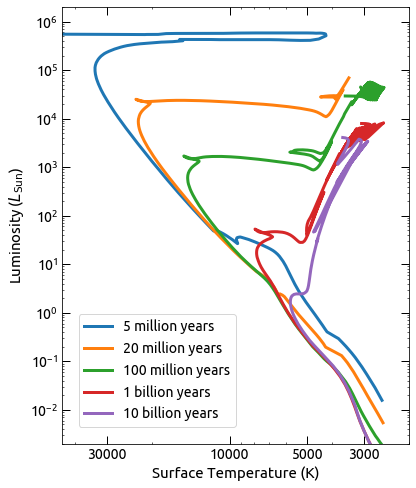

In [5]:
plt.rc("font", family='serif', serif='Ubuntu', monospace='Ubuntu Mono', \
               size=14)
plt.rc("axes", labelsize=15, titlesize=12)
plt.rc("xtick", top=True, direction='in', labelsize=14)
plt.rc("xtick.major", size=8, width=1)
plt.rc("ytick", right=True, direction='in', labelsize=14)
plt.rc("ytick.major", size=8, width=1)
plt.rc("lines", markersize=10, markeredgewidth=2)
plt.rc("lines", linewidth=3)

ig1, ax1 = plt.subplots(figsize=(6, 7))

ax1.plot(10**logT[k_y1], 10**logL[k_y1], label='5 million years')
ax1.plot(10**logT[k_y2], 10**logL[k_y2], label='20 million years')
ax1.plot(10**logT[k_y3], 10**logL[k_y3], label='100 million years')
ax1.plot(10**logT[k_o1], 10**logL[k_o1], label='1 billion years')
ax1.plot(10**logT[k_o2], 10**logL[k_o2], label='10 billion years')

ax1.set_xlim(45000, 2000)
ax1.set_ylim(2E-3, 2E6)

ax1.set_xscale('log')
ax1.set_xticks([3000, 5000, 10000, 30000])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax1.set_yscale('log')

ax1.set_xlabel('Surface Temperature (K)')
ax1.set_ylabel('Luminosity ($L_\mathrm{Sun}$)')
ax1.legend(borderaxespad=1.2)

plt.tight_layout()

plt.savefig('figures/isochrones.png')

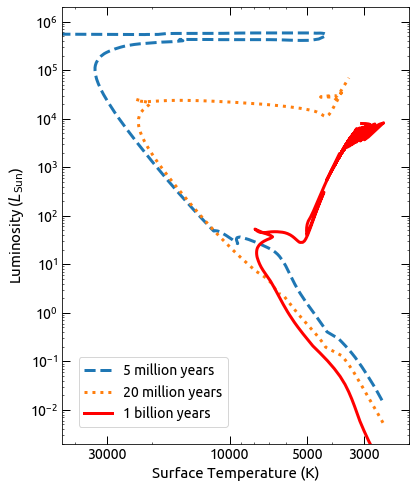

In [6]:
ig1, ax1 = plt.subplots(figsize=(6, 7))

ax1.plot(10**logT[k_y1], 10**logL[k_y1], label='5 million years', ls='--')
ax1.plot(10**logT[k_y2], 10**logL[k_y2], label='20 million years', ls=':')
ax1.plot(10**logT[k_o1], 10**logL[k_o1], label='1 billion years', color='red')

ax1.set_xlim(45000, 2000)
ax1.set_ylim(2E-3, 2E6)

ax1.set_xscale('log')
ax1.set_xticks([3000, 5000, 10000, 30000])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax1.set_yscale('log')

ax1.set_xlabel('Surface Temperature (K)')
ax1.set_ylabel('Luminosity ($L_\mathrm{Sun}$)')
ax1.legend(borderaxespad=1.2)

plt.tight_layout()

plt.savefig('figures/isochrones_bw.png')

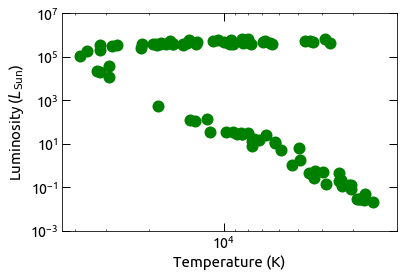

In [7]:
#tests to create stars from model

k = np.random.randint(0, sum(k_y1), 100)
t1, l1 = 10**logT[k_y1][k]*np.random.normal(1.0, 0.1, len(k)), 10**logL[k_y1][k]*np.random.normal(1.0, 0.1, len(k))

plt.plot(t1, l1, 'go')
plt.gca().invert_xaxis()
plt.loglog()
plt.xlim(45000, 2000)
plt.ylim(1E-3, 1E7)
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity ($L_\mathrm{Sun}$)')